In [1]:
import numpy as np
import random
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

## Q1: What is Estimation Statistics? Explain point estimate and interval estimate.

**Estimation Statistics** - Estimation Statistics is that part of statistics which is used to assign a specified observed numerical value to an unknown population parameter. It is part of **Inferential Statistics**.

There are 2 types of Estimates which are explained below:

1. **Point Estimate** - Point Estimate refers to assignment of a single numerical value to an unknown population parameter. E.g: Sample mean is a point estimate of a population mean.

2. **Interval Estimate** - Interval Estimate refers to assignment of a range of values to an unknown population parameter. This also helps to find the **Confidence Level** of the dataset. E.g: Average Height of a population dataset.

## Q2. Write a Python function to estimate the population mean using a sample mean and standard deviation.

Since we aregoing to estimate the Population mean using Sample Mean and Sample Standard Deviation, we are going to use Student's T-distribution for this purpose. The formula for T-test is as follows:

**$$t = \frac{m - \mu}{s / \sqrt{n}}$$**

m = sample mean

$\mu$ =population mean

s = sample standard deviation

$n$ = sample size

In [2]:
def estimate_population_mean(sample, confidence_interval):
    # Calculating Sample Mean and Sample Standard Deviation
    sample_mean = np.mean(sample)
    sample_std = np.std(sample)
    
    # Calculating degrees of freedom
    dof = len(sample) - 1
    
    # Calculating the alpha value
    alpha = 1 - confidence_interval
    
    # Calculate t-value using 2 Tailed Test
    t_value = stats.t.ppf(q= 1 - alpha / 2, df=dof)
    
    # Calculating standard error and margin error
    std_error = sample_std / math.sqrt(len(sample))
    margin_error = t_value * std_error
    
    lower_bound = sample_mean - margin_error
    upper_bound = sample_mean + margin_error
    
    return (lower_bound, upper_bound)

In [3]:
# For generating the same sequence of random numbers
np.random.seed(42)

# Generating population data
population_size = 500
population = np.random.uniform(low= 0.0, high= 100.0, size= population_size)
population_mean = np.mean(population)

# Generating the sample
sample_size = 100
sample_population = random.sample(population= list(population), k = sample_size)

# Setting confidence level
confidence_interval = 0.95

lower_bound, upper_bound = estimate_population_mean(sample_population, confidence_interval)

print ("The Population mean lies between {lb} and {ub} with a Confidence Level of 95% as obtained from Sample Mean and Std".format(lb = lower_bound, ub = upper_bound))

print("The actual Population Mean =", population_mean)

The Population mean lies between 44.83828011764679 and 56.863844092571696 with a Confidence Level of 95% as obtained from Sample Mean and Std
The actual Population Mean = 49.85617122340139


## Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing.

**Hypothesis Testing** - A statistical hypothesis test is a method of statistical inference used to decide whether the data at hand sufficiently support a particular hypothesis. Hypothesis testing allows us to make probabilistic statements about population parameters. 

Hypothesis testing is the process used to evaluate the strength of evidence from the sample and provides a framework for making determinations related to the population, i.e., it provides a method for understanding how reliably one can extrapolate observed findings in a sample under study to the larger population from which the sample was drawn.

The reasons for which Hypothesis Testing is important are as follows:

1. **Provides evidence-based conclusions**: It allows researchers to make objective conclusions based on empirical data, providing evidence to support or refute their research hypotheses.
2. **Supports decision-making**: It helps make informed decisions, such as accepting or rejecting a new treatment, implementing policy changes, or adopting new practices.
3. **Adds rigor and validity**: It adds scientific rigor to research using statistical methods to analyze data, ensuring that conclusions are based on sound statistical evidence.
4. **Contributes to the advancement of knowledge**: By testing hypotheses, researchers contribute to the growth of knowledge in their respective fields by confirming existing theories or discovering new patterns and relationships.

## Q4. Create a hypothesis that states whether the average weight of male college students is greater than the average weight of female college students.

$H_{0}$ = The average weight of male college students is less than or equal to the the average weight of the female college students.
$$H_{0}: \mu_{m} \le \mu_{f}$$

$H_{1}$ = The average weight of male college students is strictly greater than female college students.
$$H_{1}: \mu_{m} > \mu_{f}$$

$H_{0}$ = This indicates the Null Hypothesis  
$H_{1}$ = This indicates the Alternate Hypothesis  
$\mu_{m}$ = This indicates the mean weight male college students  
$\mu_{f}$ = This indicates the mean weight female college students

The **Null Hypothesis** states that either the mean weight is less than or equal to the mean weight of female college students. Whereas the **Alternate Hypothesis** states that the mean weight of male college students is strictly greater than the female college students.

## Q5. Write a Python script to conduct a hypothesis test on the difference between two population means, given a sample from each population.

In [4]:
np.random.seed(42)

# Defining 2 populations with same seeding
population1 = np.random.randint(low = 0, high = 100, size = 1000)
population2 = np.random.randint(low = 0, high = 100, size = 1000)

# Drawing 2 samples from each of the samples declared above
sample1 = random.sample(list(population1), k = 100)
sample2 = random.sample(list(population2), k = 100)

# Stating the Null and Alternate Hypothesis
null_hypothesis = "The mean of the 2 sample from different population are Equal"
alternate_hypothesis = "The mean of the 2 sample from different population are NOT Equal"

# Getting the lengths of the sample for calculating Degrees of Freedom
n1 = len(sample1)
n2 = len(sample2)
dof = n1 + n2 - 1

# Standard Deviation for both the samples
std1 = np.std(sample1)
std2 = np.std(sample2)

Formula for calculating the Standard Deviation for the combined sample($\sigma_{c}$) is as follows:

$$\sigma_{c} = \sqrt{\frac{n_{1} * (\sigma_{1}^2 + d_1^2) + n_{2} * (\sigma_{2}^2 + d_{2}^2)}{n1+n2}}$$

$n_{1}$ = size of sample 1

$n_{2}$ = size of sample 2

$\sigma_{1}^2$ = variance of sample 1
$\sigma_{2}^2$ = variance of sample 2

$d_{1}$ = $\mu_{1} - \mu_{c}$
$d_{2}$ = $\mu_{2} - \mu_{c}$

$\mu_{c}$ = mean of the combined population

$$\mu_{c} = \frac{n_{1} * \mu_{1} + n_{2} * \mu_{2}}{n_{1} + n_{2}}$$

$\mu_{1}$ =mean of sample 1

$\mu_{2}$ =mean of sample 2

In [5]:
# Following the above formulas, let's calculate the combined standard deviation
mean1 = np.mean(sample1)
mean2 = np.mean(sample2)
mu_c = (n1 * mean1 + n2 * mean2) / (n1 + n2)

# Calculating the standard deviation of the combined sample
d1 = mean1 - mu_c
d2 = mean2 - mu_c
sp = np.sqrt(n1 * (std1**2 + d1**2) + n2 * (std2**2 + d2**2) / (n1 + n2))

# Calculating the t_stats
t_stats = (mean1 - mean2) / (sp / np.sqrt(n1 + n2))

# Calculating t-critical value and p_value
# It is a 2 tailed test because the mean could be either more or less
alpha = 0.05
t_crit = stats.t.ppf(q = 1 - alpha/2, df = dof)
p_value = stats.t.cdf(x = t_stats,df = dof)

print("t_stats =", t_stats)
print("p_value = ", p_value)
print("t_critical =", t_crit)

# Comparing p_value to Significance Level(alpha = 0.05)
if p_value < alpha:
    print("Reject the Null Hypothesis:", null_hypothesis)
    print("Accept the Alternate Hypothesis:", alternate_hypothesis)
else:
    print("Fail to reject the Null Hypothesis:",null_hypothesis)

# Comparing t_stas to t_critical value
if abs(t_stats) > t_crit:
    print("Reject the null hypothesis: " + null_hypothesis)
    print("Accept the alternative hypothesis: " + alt_hypothesis)
else:
    print("Fail to reject the null hypothesis: " + null_hypothesis)    

t_stats = -0.03927892252474522
p_value =  0.48435369417889773
t_critical = 1.971956544249395
Fail to reject the Null Hypothesis: The mean of the 2 sample from different population are Equal
Fail to reject the null hypothesis: The mean of the 2 sample from different population are Equal


## Q6: What is a null and alternative hypothesis? Give some examples.

**Null Hypothesis** - In scientific research, the Null Hypothesis($H_{0}$) is the claim that no relationship exists between two sets of data or variables being analyzed. The null hypothesis is that any experimentally observed difference is due to chance alone, and an underlying causative relationship does not exist, hence the term "null".

**Alternate Hypothesis** - Alternative Hypothesis($H_{1}$) defines there is a statistically important relationship between two variables. It is contradictory to the null hypothesis.

**Examples:**

1. **Null Hypothesis** - The mean of all the students in a class is 180cm.  
   **Alternate Hypothesis** - The mean of all the students in a class is less than 180cm.
   
2. **Null Hypothesis** - The medicine has no effect on IQ.  
   **Alternate Hypothesis** - The medicine has some effect on IQ.

## Q7: Write down the steps involved in hypothesis testing.

The steps involved in Hypothesis Testing are as follows:

1. Declare **Null Hypothesis** - We first declare the Null Hypothesis which we get from the problem statement and is bluntly mentioned as truth.
2. Declare **Alternate Hypothesis** - We then  declare an Alternate hypothesis which is in contrast to the declared Null Hypothesis in the first step.
3. Perform **Experminets** - We perform different experiments and statistical analysis to establish the truthness in the hypothesis.
4. Based on the experiments done in the previous step we either **Accept the Null Hypothesis** or **Reject the Null Hypothesis**.

## Q8. Define p-value and explain its significance in hypothesis testing.

**p-value** - The p value, or probability value, tells us how likely it is that the data could have occurred under the Null Hypothesis. It does this by calculating the likelihood of the test statistic, which is the number calculated by a statistical test using the data.

Significane of **p-value** in Hypothesis Testing:

1. P values are most often used by researchers to say whether a certain pattern they have measured is statistically significant.
2. Statistical significance is another way of saying that the p-value of a statistical test is small enough to reject the null hypothesis of the test.

## Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom parameter set to 10.

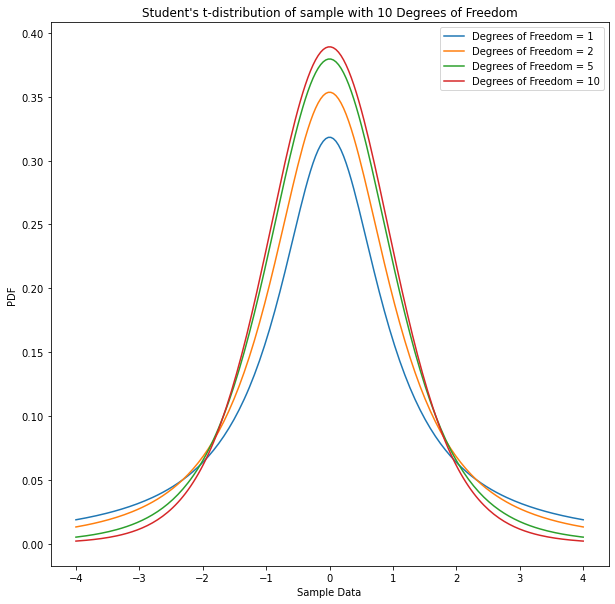

In [6]:
# Creating a sample
sample_dist = np.linspace(-4, 4, 200)

# Declaring degrees of freedom
dof = [1, 2, 5, 10]

plt.figure(figsize=(10,10))
# Calculating the p-value using Student's t-distribution
for i in range(len(dof)):
    p_val = stats.t.pdf(x = sample_dist, df = dof[i])
    plt.plot(sample_dist, p_val, label=f"Degrees of Freedom = {dof[i]}")

plt.title("Student's t-distribution of sample with 10 Degrees of Freedom")
plt.xlabel("Sample Data")
plt.ylabel("PDF")
plt.legend()

## Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two random samples of equal size and a null hypothesis that the population means are equal.

In [7]:
pop1 = np.random.randint(low = 0, high= 50, size= 5000)
pop2 = np.random.randint(low = 0, high= 100, size= 1000)


samp1 = random.sample(population=list(pop1), k = 100)
samp2 = random.sample(population=list(pop2), k = 100)

t_stat, p_val = stats.ttest_ind(samp1, samp2)

alpha = 0.05
null_hypo = "Population means for both the samples are EQUAL"
alt_hypo = "Population means for both the samples are NOT EQUAL"

if p_val < alpha:
    print("Reject the Null Hypothesis:", null_hypo)
    print("Accept the Alternate Hypothesis:", alt_hypo)
else:
    print("Fail to Reject the Null Hypothesis:", null_hypo)
    print("Reject the Alternate Hypothesis:", alt_hypo)

Reject the Null Hypothesis: Population means for both the samples are EQUAL
Accept the Alternate Hypothesis: Population means for both the samples are NOT EQUAL


## Q11: What is Student’s t distribution? When to use the t-Distribution?

In probability and statistics, Student's t-distribution is a continuous probability distribution that generalizes the standard normal distribution. Like Normal Distribution, it is symmetric around zero and bell-shaped.In probability and statistics, the normal distribution is a bell-shaped distribution whose mean is μ and the standard deviation is σ. The t-distribution is similar to normal distribution but flatter and shorter than a normal distribution. 

**When to use t-Distribution** - 
1. The T Distribution also called the student’s t-distribution is used while making assumptions about a mean when we don’t know the population standard deviation.
2. Sample size is small.
3. The population is usually normally distributed(Central Limit Theorem).
4. When we want to draw inferences about the population mean.

## Q12: What is t-statistic? State the formula for t-statistic.

The t-statistic is a test statistic that is used in hypothesis testing and confidence interval estimation when the population standard deviation is unknown and the sample size is small. It is a standardized measure of the difference between the sample mean and the hypothesized population mean, in units of the sample standard deviation.

The formula for T-test is as follows:

**$$t = \frac{m - \mu}{s / \sqrt{n}}$$**

m = sample mean

$\mu$ =population mean

s = sample standard deviation

$n$ = sample size

#### The formula shows that the t-statistic is the difference between the sample mean and hypothesized population mean, standardized by the standard error of the mean, which is the sample standard deviation divided by the square root of the sample size.

## Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random sample of 50 days and find the sample mean revenue to be $\$500$ with a standard deviation of $50. Estimate the population mean revenue with a 95% confidence interval.

In [8]:
sample_mean = 500
sample_std = 50
sample_size = 50

ci = 0.95
alpha = 1 - ci
dof = sample_size - 1

# 2 tailed test
t_crit = stats.t.ppf(q = 1 - alpha / 2, df = dof)

std_error = sample_std / np.sqrt(sample_size)
margin_error = t_crit * std_error

lb = sample_mean - margin_error
ub = sample_mean + margin_error

print(f"The 95% confidence interval for the population mean revenue is: (${lb:.2f}, ${ub:.2f})")

The 95% confidence interval for the population mean revenue is: ($485.79, $514.21)


## Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.

In [15]:
null_hypo = "The BP decreases by 10mmHg"
alt_hypo = "The BP decreases less than 10mmHg"

sample_size = 100
sample_std = 3
sample_mean = 8
pop_mean = 10

alpha = 0.05

dof = sample_size - 1

t_val = (sample_mean - pop_mean) / (sample_std / np.sqrt(sample_size))
p_val = stats.t.cdf(x = t_val, df = dof)

print("The p_value is: ", p_val)

if p_val < alpha:
    print("Reject the Null Hypotheis:", null_hypo)
    print("Accept the Alternate Hypothesis:", alt_hypo)
else:
    print("Fail to reject the Null Hypothesis:", null_hypo)

The p_value is:  7.506144504985108e-10
Reject the Null Hypotheis: The BP decreases by 10mmHg
Accept the Alternate Hypothesis: The BP decreases less than 10mmHg


## Q15. An electronics company produces a certain type of product with a mean weight of 5 pounds and a standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight is found to be 4.8 pounds. Test the hypothesis that the true mean weight of the products is less than 5 pounds with a significance level of 0.01.

In [21]:
pop_mean = 5
pop_std = 0.5

sample_size = 25
sample_mean = 4.8

alpha = 0.01

dof = sample_size - 1

null_hypo = "The true mean weight of the products is equal to 5pounds"
alt_hypo = "The true mean weight of the products is less than 5pounds"

t_val = (sample_mean - pop_mean) / (pop_std / np.sqrt(sample_size))
p_val = stats.t.cdf(x = t_val, df = dof)

print("The p_val is:", p_val)
print("The significance level is:", alpha)

if p_val < alpha:
    print("Reject the Null Hypotheis:", null_hypo)
    print("Accept the Alternate Hypothesis:", alt_hypo)
else:
    print("Fail to reject the Null Hypothesis:", null_hypo)
    print("The p_val lies in the confidence level region")

The p_val is: 0.02846992496829572
The significance level is: 0.01
Fail to reject the Null Hypothesis: The true mean weight of the products is equal to 5pounds
The p_val lies in the confidence level region


## Q16. Two groups of students are given different study materials to prepare for a test. The first group (n1 = 30) has a mean score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean score of 75 with a standard deviation of 8. Test the hypothesis that the population means for the two groups are equal with a significance level of 0.01.

The given problem is an example of 2 sample t-test. The formula for calculating the t-val for the 2 sampel test is as follows:

$$ t = \frac{\bar{x_{1}} - \bar{x_{2}}}{\sqrt{\frac{s_{1}^2}{n_{1}} + \frac{s_{2}^2}{n_{2}}}} $$

$\bar{x_{1}}$ = mean of $x_{1}$  
$\bar{x_{2}}$ = mean of $x_{2}$  
${s_{1}^2}$ = variance of $x_{1}$(square of standard deviation)  
${s_{2}^2}$ = variance of $x_{2}$(square of standard deviation)  
${n_{1}}$ = sample size of first population  
${n_{2}}$ = sample size of second population

In [26]:
n1 = 30
n2 = 40

x1_mean = 80
x2_mean = 75

x1_std = 10
x2_std = 8

alpha = 0.01

null_hypo = "The Population mean for the 2 populations are EQUAL"
alt_hypo = "The Population mean for the 2 populations are NOT EQUAL"

dof = n1 + n2 - 2

t_val = (x1_mean -x2_mean) / np.sqrt(((x1_std ** 2) / n1 ) + ((x2_std ** 2) / n2))
p_val = stats.t.cdf(x = t_val, df = dof)

print("The p_val is:", p_val)
print("The significance level is:", alpha)

if p_val < alpha:
    print("Reject the Null Hypotheis:", null_hypo)
    print("Accept the Alternate Hypothesis:", alt_hypo)
else:
    print("Fail to reject the Null Hypothesis:", null_hypo)
    print("The p_val lies in the confidence level region")

The p_val is: 0.9861932598161512
The significance level is: 0.01
Fail to reject the Null Hypothesis: The Population mean for the 2 populations are EQUAL
The p_val lies in the confidence level region


## Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard deviation of 1.5. Estimate the population mean with a 99% confidence interval.

In [30]:
sample_size = 50
sample_mean = 4
sample_std = 1.5

ci = 0.99
alpha = 1 - ci

dof = sample_size - 1

t_crit = stats.t.ppf(q = 1 - alpha / 2, df = dof)

std_error = sample_std / np.sqrt(sample_size)
margin_error = t_crit * std_error

lb = sample_mean - margin_error
ub = sample_mean + margin_error

print("The population mean is between {lb} and {ub} with {ci}% confidence".format(lb = round(lb, 2), ub = round(ub, 2), ci = ci * 100))

The population mean is between 3.43 and 4.57 with 99.0% confidence
